## Activations (e)

In [1]:
# with best param from b

In [2]:

from neuralnet import *
from random import shuffle
import numpy as np

# Load the configuration.
config = load_config("./data")
# Load model parameters
# TODO: GET BEST PARAMS FROM (d) Regularization
config = {}
config['layer_specs'] = [3072, 64, 64, 10]
config['learning_rate'] = 0.01
config['batch_size'] = 256 
config['epochs'] = 150
config['early_stop'] = True 
config['early_stop_epoch'] = 5  
config['L2_penalty'] = 0.001 
config['momentum'] = True  
config['momentum_gamma'] = 0.9  

# Test different activations (not including tanh)
activations = ['ReLU','leakyReLU', 'sigmoid']
# Load the data
X_train, y_train, X_stats = load_data(path="./data", stats=None, mode="train")
X_test, y_test = load_data(path="./data", stats=X_stats, mode="test")
X_train, y_train, X_valid, y_valid = split_data(X_train,y_train)

(50000, 32, 32, 3)


In [3]:
all_train_loss_record = []
all_train_acc_record = []

all_valid_loss_record = []
all_valid_acc_record = []

all_test_acc_record = []
epoch_record = []

for activation in activations:
    config['activation'] = activation
    model = Neuralnetwork(config)    
    epoch, train_loss_record, train_accuracy_record, valid_loss_record, valid_accuracy_record = train(model,X_train,y_train,X_valid,y_valid,config)
    all_train_loss_record.append(train_loss_record)
    all_train_acc_record.append(train_accuracy_record)
    all_valid_loss_record.append(valid_loss_record)
    all_valid_acc_record.append(valid_accuracy_record)

    # Recall parameters with minimum validation loss
    model.save_load_weight(save=False) # load best weights
    test_accuracy = test(model, X_test, y_test) 
    all_test_acc_record.append(test_accuracy)
    epoch_record.append(epoch)

Epoch: 1, train accuracy: 0.1014, train_loss_norm:1000.2854, valid_acc: 0.1052, valid_loss_norm: 1083.8226
Valid loss going down!
Epoch: 2, train accuracy: 0.1023, train_loss_norm:1065.0619, valid_acc: 0.0946, valid_loss_norm: 1046.3084
Valid loss going down!
Epoch: 3, train accuracy: 0.1002, train_loss_norm:1028.1975, valid_acc: 0.0984, valid_loss_norm: 1010.0933
Valid loss going down!
Epoch: 4, train accuracy: 0.1019, train_loss_norm:992.6092, valid_acc: 0.1056, valid_loss_norm: 975.1319
Valid loss going down!
Epoch: 5, train accuracy: 0.1035, train_loss_norm:958.2530, valid_acc: 0.0966, valid_loss_norm: 941.3807
Valid loss going down!
Epoch: 6, train accuracy: 0.1015, train_loss_norm:925.0863, valid_acc: 0.1000, valid_loss_norm: 908.7980
Valid loss going down!
Epoch: 7, train accuracy: 0.1036, train_loss_norm:893.0677, valid_acc: 0.0966, valid_loss_norm: 877.3435
Valid loss going down!
Epoch: 8, train accuracy: 0.1024, train_loss_norm:862.1577, valid_acc: 0.0984, valid_loss_norm: 84

Epoch: 65, train accuracy: 0.1022, train_loss_norm:115.9143, valid_acc: 0.0984, valid_loss_norm: 113.8768
Valid loss going down!
Epoch: 66, train accuracy: 0.1013, train_loss_norm:111.9094, valid_acc: 0.0966, valid_loss_norm: 109.9425
Valid loss going down!
Epoch: 67, train accuracy: 0.1006, train_loss_norm:108.0430, valid_acc: 0.0946, valid_loss_norm: 106.1441
Valid loss going down!
Epoch: 68, train accuracy: 0.0994, train_loss_norm:104.3106, valid_acc: 0.1034, valid_loss_norm: 102.4774
Valid loss going down!
Epoch: 69, train accuracy: 0.1006, train_loss_norm:100.7073, valid_acc: 0.0946, valid_loss_norm: 98.9378
Valid loss going down!
Epoch: 70, train accuracy: 0.1021, train_loss_norm:97.2288, valid_acc: 0.0966, valid_loss_norm: 95.5207
Valid loss going down!
Epoch: 71, train accuracy: 0.1042, train_loss_norm:93.8707, valid_acc: 0.1000, valid_loss_norm: 92.2216
Valid loss going down!
Epoch: 72, train accuracy: 0.1002, train_loss_norm:90.6289, valid_acc: 0.1056, valid_loss_norm: 89.036

Epoch: 130, train accuracy: 0.1029, train_loss_norm:11.9433, valid_acc: 0.1056, valid_loss_norm: 11.7371
Valid loss going down!
Epoch: 131, train accuracy: 0.1007, train_loss_norm:11.5378, valid_acc: 0.1010, valid_loss_norm: 11.3385
Valid loss going down!
Epoch: 132, train accuracy: 0.1010, train_loss_norm:11.1463, valid_acc: 0.1034, valid_loss_norm: 10.9540
Valid loss going down!
Epoch: 133, train accuracy: 0.1035, train_loss_norm:10.7685, valid_acc: 0.0986, valid_loss_norm: 10.5828
Valid loss going down!
Epoch: 134, train accuracy: 0.1022, train_loss_norm:10.4036, valid_acc: 0.1056, valid_loss_norm: 10.2244
Valid loss going down!
Epoch: 135, train accuracy: 0.1006, train_loss_norm:10.0514, valid_acc: 0.1010, valid_loss_norm: 9.8784
Valid loss going down!
Epoch: 136, train accuracy: 0.1021, train_loss_norm:9.7114, valid_acc: 0.0946, valid_loss_norm: 9.5447
Valid loss going down!
Epoch: 137, train accuracy: 0.1011, train_loss_norm:9.3832, valid_acc: 0.0946, valid_loss_norm: 9.2220
Vali

/Users/emmet.y/Desktop/CSE251B/PA2_starter/neuralnet.py:430: RuntimeWarning: overflow encountered in square
  loss += (np.mean(layer.w ** 2)) * self.l2_penalty / 2.
/Users/emmet.y/Desktop/CSE251B/PA2_starter/neuralnet.py:266: RuntimeWarning: invalid value encountered in greater
  return np.where(self.x > 0, 1, 0.1)


Epoch: 1, train accuracy: 0.0998, train_loss_norm:nan, valid_acc: 0.1010, valid_loss_norm: nan
Valid loss going down!
Epoch: 2, train accuracy: 0.0999, train_loss_norm:nan, valid_acc: 0.1010, valid_loss_norm: nan
Valid loss going down!
Epoch: 3, train accuracy: 0.0999, train_loss_norm:nan, valid_acc: 0.1010, valid_loss_norm: nan
Valid loss going down!
Epoch: 4, train accuracy: 0.0998, train_loss_norm:nan, valid_acc: 0.1010, valid_loss_norm: nan
Valid loss going down!
Epoch: 5, train accuracy: 0.0999, train_loss_norm:nan, valid_acc: 0.1010, valid_loss_norm: nan
Valid loss going down!
Epoch: 6, train accuracy: 0.0999, train_loss_norm:nan, valid_acc: 0.1010, valid_loss_norm: nan
Valid loss going down!
Epoch: 7, train accuracy: 0.0999, train_loss_norm:nan, valid_acc: 0.1010, valid_loss_norm: nan
Valid loss going down!
Epoch: 8, train accuracy: 0.0999, train_loss_norm:nan, valid_acc: 0.1010, valid_loss_norm: nan
Valid loss going down!
Epoch: 9, train accuracy: 0.0999, train_loss_norm:nan, v

Epoch: 70, train accuracy: 0.0999, train_loss_norm:nan, valid_acc: 0.1010, valid_loss_norm: nan
Valid loss going down!
Epoch: 71, train accuracy: 0.0999, train_loss_norm:nan, valid_acc: 0.1010, valid_loss_norm: nan
Valid loss going down!
Epoch: 72, train accuracy: 0.0999, train_loss_norm:nan, valid_acc: 0.1010, valid_loss_norm: nan
Valid loss going down!
Epoch: 73, train accuracy: 0.0999, train_loss_norm:nan, valid_acc: 0.1010, valid_loss_norm: nan
Valid loss going down!
Epoch: 74, train accuracy: 0.0999, train_loss_norm:nan, valid_acc: 0.1010, valid_loss_norm: nan
Valid loss going down!
Epoch: 75, train accuracy: 0.0998, train_loss_norm:nan, valid_acc: 0.1010, valid_loss_norm: nan
Valid loss going down!
Epoch: 76, train accuracy: 0.0999, train_loss_norm:nan, valid_acc: 0.1010, valid_loss_norm: nan
Valid loss going down!
Epoch: 77, train accuracy: 0.0999, train_loss_norm:nan, valid_acc: 0.1010, valid_loss_norm: nan
Valid loss going down!
Epoch: 78, train accuracy: 0.0999, train_loss_no

Epoch: 139, train accuracy: 0.0999, train_loss_norm:nan, valid_acc: 0.1010, valid_loss_norm: nan
Valid loss going down!
Epoch: 140, train accuracy: 0.0999, train_loss_norm:nan, valid_acc: 0.1010, valid_loss_norm: nan
Valid loss going down!
Epoch: 141, train accuracy: 0.0999, train_loss_norm:nan, valid_acc: 0.1010, valid_loss_norm: nan
Valid loss going down!
Epoch: 142, train accuracy: 0.0999, train_loss_norm:nan, valid_acc: 0.1010, valid_loss_norm: nan
Valid loss going down!
Epoch: 143, train accuracy: 0.0999, train_loss_norm:nan, valid_acc: 0.1010, valid_loss_norm: nan
Valid loss going down!
Epoch: 144, train accuracy: 0.0999, train_loss_norm:nan, valid_acc: 0.1010, valid_loss_norm: nan
Valid loss going down!
Epoch: 145, train accuracy: 0.0998, train_loss_norm:nan, valid_acc: 0.1010, valid_loss_norm: nan
Valid loss going down!
Epoch: 146, train accuracy: 0.0999, train_loss_norm:nan, valid_acc: 0.1010, valid_loss_norm: nan
Valid loss going down!
Epoch: 147, train accuracy: 0.0999, trai

Epoch: 52, train accuracy: 0.5592, train_loss_norm:0.1302, valid_acc: 0.4316, valid_loss_norm: 0.1671
Valid loss going down!
Epoch: 53, train accuracy: 0.5657, train_loss_norm:0.1287, valid_acc: 0.4226, valid_loss_norm: 0.1686
Valid loss go up!
Current patience count: 1
Epoch: 54, train accuracy: 0.5672, train_loss_norm:0.1280, valid_acc: 0.4102, valid_loss_norm: 0.1702
Valid loss go up!
Current patience count: 2
Epoch: 55, train accuracy: 0.5647, train_loss_norm:0.1291, valid_acc: 0.4188, valid_loss_norm: 0.1696
Valid loss going down!
Epoch: 56, train accuracy: 0.5724, train_loss_norm:0.1279, valid_acc: 0.4192, valid_loss_norm: 0.1691
Valid loss going down!
Epoch: 57, train accuracy: 0.5698, train_loss_norm:0.1278, valid_acc: 0.4280, valid_loss_norm: 0.1706
Valid loss go up!
Current patience count: 1
Epoch: 58, train accuracy: 0.5711, train_loss_norm:0.1274, valid_acc: 0.4252, valid_loss_norm: 0.1743
Valid loss go up!
Current patience count: 2
Epoch: 59, train accuracy: 0.5764, train_

Epoch: 114, train accuracy: 0.6411, train_loss_norm:0.1097, valid_acc: 0.4312, valid_loss_norm: 0.1737
Valid loss going down!
Epoch: 115, train accuracy: 0.6431, train_loss_norm:0.1106, valid_acc: 0.4318, valid_loss_norm: 0.1740
Valid loss go up!
Current patience count: 1
Epoch: 116, train accuracy: 0.6405, train_loss_norm:0.1111, valid_acc: 0.4396, valid_loss_norm: 0.1728
Valid loss going down!
Epoch: 117, train accuracy: 0.6478, train_loss_norm:0.1086, valid_acc: 0.4382, valid_loss_norm: 0.1726
Valid loss going down!
Epoch: 118, train accuracy: 0.6452, train_loss_norm:0.1093, valid_acc: 0.4344, valid_loss_norm: 0.1705
Valid loss going down!
Epoch: 119, train accuracy: 0.6467, train_loss_norm:0.1089, valid_acc: 0.4324, valid_loss_norm: 0.1733
Valid loss go up!
Current patience count: 1
Epoch: 120, train accuracy: 0.6415, train_loss_norm:0.1101, valid_acc: 0.4360, valid_loss_norm: 0.1755
Valid loss go up!
Current patience count: 2
Epoch: 121, train accuracy: 0.6446, train_loss_norm:0.1

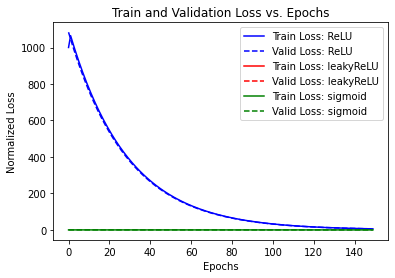

In [6]:
## Plot train and valid loss on one graph
import matplotlib.pyplot as plt

# Line type
train_loss_lt = ['-b', '-r', '-g']
valid_loss_lt = ['--b', '--r', '--g']

for i, activation in enumerate(activations):
    plt.plot(np.arange(epoch_record[i]+1), all_train_loss_record[i], train_loss_lt[i], label=f"Train Loss: {activation}")
    plt.plot(np.arange(epoch_record[i]+1), all_valid_loss_record[i], valid_loss_lt[i], label=f"Valid Loss: {activation}")
plt.xlabel('Epochs')
plt.ylabel('Normalized Loss')
plt.title("Train and Validation Loss vs. Epochs")
plt.legend()
plt.savefig('plots/(e)_act_loss.png')
plt.show()

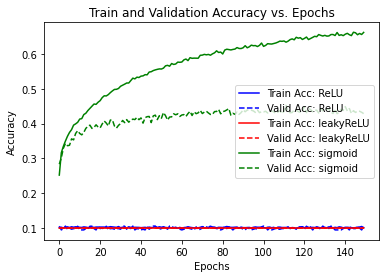

In [7]:
## Plot Train and valid acc on another

# Line type
train_acc_lt = ['-b', '-r', '-g']
valid_acc_lt = ['--b', '--r', '--g']

for i, activation in enumerate(activations):
    plt.plot(np.arange(epoch_record[i]+1), all_train_acc_record[i], train_acc_lt[i], label=f"Train Acc: {activation}")
    plt.plot(np.arange(epoch_record[i]+1), all_valid_acc_record[i], valid_acc_lt[i], label=f"Valid Acc: {activation}")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Train and Validation Accuracy vs. Epochs")
plt.legend()
plt.savefig('plots/(e)_act_acc.png')
plt.show()

In [ ]:
##Update PAram

In [19]:
import matplotlib.pyplot as plt
from neuralnet import *
from random import shuffle
import numpy as np

# Load the configuration.
config = load_config("./data")
# Load model parameters
# TODO: GET BEST PARAMS FROM (d) Regularization
config = {}
config['layer_specs'] = [3072, 64, 64, 10]
config['learning_rate'] = 0.005
config['batch_size'] = 256 
config['epochs'] = 150
config['early_stop'] = True 
config['early_stop_epoch'] = 5  
config['L2_penalty'] = 0.005
config['momentum'] = True  
config['momentum_gamma'] = 0.9  

# Test different activations (not including tanh)
activations = ['ReLU','leakyReLU', 'sigmoid']
# Load the data
X_train, y_train, X_stats = load_data(path="./data", stats=None, mode="train")
X_test, y_test = load_data(path="./data", stats=X_stats, mode="test")
X_train, y_train, X_valid, y_valid = split_data(X_train,y_train)
all_train_loss_record = []
all_train_acc_record = []

all_valid_loss_record = []
all_valid_acc_record = []

all_test_acc_record = []
epoch_record = []

for activation in activations:
    config['activation'] = activation
    model = Neuralnetwork(config)
    model.scale_weights(0.1)
    
    epoch, train_loss_record, train_accuracy_record, valid_loss_record, valid_accuracy_record = train(model,X_train,y_train,X_valid,y_valid,config)
    all_train_loss_record.append(train_loss_record)
    all_train_acc_record.append(train_accuracy_record)
    all_valid_loss_record.append(valid_loss_record)
    all_valid_acc_record.append(valid_accuracy_record)

    # Recall parameters with minimum validation loss
    model.save_load_weight(save=False) # load best weights
    test_accuracy = test(model, X_test, y_test) 
    all_test_acc_record.append(test_accuracy)
    epoch_record.append(epoch)
    

(50000, 32, 32, 3)
Epoch: 1, train accuracy: 0.2922, train_loss_norm:0.2020, valid_acc: 0.3494, valid_loss_norm: 0.1861
Valid loss going down!
Epoch: 2, train accuracy: 0.3508, train_loss_norm:0.1872, valid_acc: 0.3230, valid_loss_norm: 0.1903
Valid loss go up!
Current patience count: 1
Epoch: 3, train accuracy: 0.3787, train_loss_norm:0.1831, valid_acc: 0.3802, valid_loss_norm: 0.1795
Valid loss going down!
Epoch: 4, train accuracy: 0.3930, train_loss_norm:0.1785, valid_acc: 0.3530, valid_loss_norm: 0.1852
Valid loss go up!
Current patience count: 1
Epoch: 5, train accuracy: 0.3970, train_loss_norm:0.1775, valid_acc: 0.3944, valid_loss_norm: 0.1775
Valid loss going down!
Epoch: 6, train accuracy: 0.4237, train_loss_norm:0.1711, valid_acc: 0.3740, valid_loss_norm: 0.1782
Valid loss go up!
Current patience count: 1
Epoch: 7, train accuracy: 0.4397, train_loss_norm:0.1684, valid_acc: 0.3932, valid_loss_norm: 0.1718
Valid loss going down!
Epoch: 8, train accuracy: 0.4374, train_loss_norm:

Epoch: 62, train accuracy: 0.5700, train_loss_norm:0.1374, valid_acc: 0.4316, valid_loss_norm: 0.1734
Valid loss going down!
Epoch: 63, train accuracy: 0.5654, train_loss_norm:0.1381, valid_acc: 0.4364, valid_loss_norm: 0.1757
Valid loss go up!
Current patience count: 1
Epoch: 64, train accuracy: 0.5596, train_loss_norm:0.1402, valid_acc: 0.4390, valid_loss_norm: 0.1748
Valid loss going down!
Epoch: 65, train accuracy: 0.5678, train_loss_norm:0.1377, valid_acc: 0.4504, valid_loss_norm: 0.1663
Valid loss going down!
Epoch: 66, train accuracy: 0.5710, train_loss_norm:0.1364, valid_acc: 0.4292, valid_loss_norm: 0.1750
Valid loss go up!
Current patience count: 1
Epoch: 67, train accuracy: 0.5682, train_loss_norm:0.1371, valid_acc: 0.4378, valid_loss_norm: 0.1827
Valid loss go up!
Current patience count: 2
Epoch: 68, train accuracy: 0.5677, train_loss_norm:0.1382, valid_acc: 0.4294, valid_loss_norm: 0.1749
Valid loss going down!
Epoch: 69, train accuracy: 0.5699, train_loss_norm:0.1373, val

Epoch: 123, train accuracy: 0.6058, train_loss_norm:0.1272, valid_acc: 0.4544, valid_loss_norm: 0.1748
Valid loss go up!
Current patience count: 1
Epoch: 124, train accuracy: 0.6094, train_loss_norm:0.1255, valid_acc: 0.4594, valid_loss_norm: 0.1695
Valid loss going down!
Epoch: 125, train accuracy: 0.6031, train_loss_norm:0.1274, valid_acc: 0.4486, valid_loss_norm: 0.1706
Valid loss go up!
Current patience count: 1
Epoch: 126, train accuracy: 0.6010, train_loss_norm:0.1289, valid_acc: 0.4494, valid_loss_norm: 0.1725
Valid loss go up!
Current patience count: 2
Epoch: 127, train accuracy: 0.6073, train_loss_norm:0.1274, valid_acc: 0.4512, valid_loss_norm: 0.1711
Valid loss going down!
Epoch: 128, train accuracy: 0.6054, train_loss_norm:0.1265, valid_acc: 0.4478, valid_loss_norm: 0.1779
Valid loss go up!
Current patience count: 1
Epoch: 129, train accuracy: 0.6069, train_loss_norm:0.1270, valid_acc: 0.4510, valid_loss_norm: 0.1744
Valid loss going down!
Epoch: 130, train accuracy: 0.5982

Epoch: 34, train accuracy: 0.6065, train_loss_norm:0.1230, valid_acc: 0.4822, valid_loss_norm: 0.1546
Valid loss going down!
Epoch: 35, train accuracy: 0.6053, train_loss_norm:0.1223, valid_acc: 0.4754, valid_loss_norm: 0.1594
Valid loss go up!
Current patience count: 1
Epoch: 36, train accuracy: 0.6125, train_loss_norm:0.1213, valid_acc: 0.4796, valid_loss_norm: 0.1602
Valid loss go up!
Current patience count: 2
Epoch: 37, train accuracy: 0.6113, train_loss_norm:0.1204, valid_acc: 0.4756, valid_loss_norm: 0.1602
Valid loss going down!
Epoch: 38, train accuracy: 0.6054, train_loss_norm:0.1235, valid_acc: 0.4618, valid_loss_norm: 0.1585
Valid loss going down!
Epoch: 39, train accuracy: 0.6076, train_loss_norm:0.1214, valid_acc: 0.4804, valid_loss_norm: 0.1594
Valid loss go up!
Current patience count: 1
Epoch: 40, train accuracy: 0.6152, train_loss_norm:0.1197, valid_acc: 0.4518, valid_loss_norm: 0.1678
Valid loss go up!
Current patience count: 2
Epoch: 41, train accuracy: 0.6141, train_

Epoch: 95, train accuracy: 0.6496, train_loss_norm:0.1114, valid_acc: 0.4802, valid_loss_norm: 0.1648
Valid loss go up!
Current patience count: 1
Epoch: 96, train accuracy: 0.6425, train_loss_norm:0.1128, valid_acc: 0.4756, valid_loss_norm: 0.1656
Valid loss go up!
Current patience count: 2
Epoch: 97, train accuracy: 0.6453, train_loss_norm:0.1131, valid_acc: 0.4808, valid_loss_norm: 0.1610
Valid loss going down!
Epoch: 98, train accuracy: 0.6476, train_loss_norm:0.1115, valid_acc: 0.4862, valid_loss_norm: 0.1632
Valid loss go up!
Current patience count: 1
Epoch: 99, train accuracy: 0.6476, train_loss_norm:0.1128, valid_acc: 0.4820, valid_loss_norm: 0.1623
Valid loss going down!
Epoch: 100, train accuracy: 0.6409, train_loss_norm:0.1133, valid_acc: 0.4604, valid_loss_norm: 0.1643
Valid loss go up!
Current patience count: 1
Epoch: 101, train accuracy: 0.6452, train_loss_norm:0.1122, valid_acc: 0.4788, valid_loss_norm: 0.1665
Valid loss go up!
Current patience count: 2
Epoch: 102, train 

Epoch: 6, train accuracy: 0.4727, train_loss_norm:0.1533, valid_acc: 0.4440, valid_loss_norm: 0.1610
Valid loss going down!
Epoch: 7, train accuracy: 0.4834, train_loss_norm:0.1501, valid_acc: 0.4506, valid_loss_norm: 0.1569
Valid loss going down!
Epoch: 8, train accuracy: 0.4961, train_loss_norm:0.1467, valid_acc: 0.4550, valid_loss_norm: 0.1562
Valid loss going down!
Epoch: 9, train accuracy: 0.5066, train_loss_norm:0.1441, valid_acc: 0.4510, valid_loss_norm: 0.1566
Valid loss go up!
Current patience count: 1
Epoch: 10, train accuracy: 0.5160, train_loss_norm:0.1420, valid_acc: 0.4592, valid_loss_norm: 0.1545
Valid loss going down!
Epoch: 11, train accuracy: 0.5206, train_loss_norm:0.1406, valid_acc: 0.4656, valid_loss_norm: 0.1543
Valid loss going down!
Epoch: 12, train accuracy: 0.5304, train_loss_norm:0.1381, valid_acc: 0.4624, valid_loss_norm: 0.1550
Valid loss go up!
Current patience count: 1
Epoch: 13, train accuracy: 0.5351, train_loss_norm:0.1365, valid_acc: 0.4658, valid_los

Epoch: 68, train accuracy: 0.6573, train_loss_norm:0.1068, valid_acc: 0.4612, valid_loss_norm: 0.1636
Valid loss go up!
Current patience count: 1
Epoch: 69, train accuracy: 0.6581, train_loss_norm:0.1069, valid_acc: 0.4744, valid_loss_norm: 0.1589
Valid loss going down!
Epoch: 70, train accuracy: 0.6591, train_loss_norm:0.1065, valid_acc: 0.4678, valid_loss_norm: 0.1600
Valid loss go up!
Current patience count: 1
Epoch: 71, train accuracy: 0.6566, train_loss_norm:0.1073, valid_acc: 0.4690, valid_loss_norm: 0.1618
Valid loss go up!
Current patience count: 2
Epoch: 72, train accuracy: 0.6567, train_loss_norm:0.1070, valid_acc: 0.4732, valid_loss_norm: 0.1603
Valid loss going down!
Epoch: 73, train accuracy: 0.6569, train_loss_norm:0.1074, valid_acc: 0.4742, valid_loss_norm: 0.1584
Valid loss going down!
Epoch: 74, train accuracy: 0.6610, train_loss_norm:0.1059, valid_acc: 0.4736, valid_loss_norm: 0.1583
Valid loss going down!
Epoch: 75, train accuracy: 0.6574, train_loss_norm:0.1069, val

Epoch: 129, train accuracy: 0.6823, train_loss_norm:0.1011, valid_acc: 0.4556, valid_loss_norm: 0.1657
Valid loss going down!
Epoch: 130, train accuracy: 0.6803, train_loss_norm:0.1012, valid_acc: 0.4684, valid_loss_norm: 0.1636
Valid loss going down!
Epoch: 131, train accuracy: 0.6830, train_loss_norm:0.1005, valid_acc: 0.4644, valid_loss_norm: 0.1634
Valid loss going down!
Epoch: 132, train accuracy: 0.6848, train_loss_norm:0.1003, valid_acc: 0.4630, valid_loss_norm: 0.1644
Valid loss go up!
Current patience count: 1
Epoch: 133, train accuracy: 0.6907, train_loss_norm:0.0993, valid_acc: 0.4662, valid_loss_norm: 0.1670
Valid loss go up!
Current patience count: 2
Epoch: 134, train accuracy: 0.6837, train_loss_norm:0.1007, valid_acc: 0.4606, valid_loss_norm: 0.1653
Valid loss going down!
Epoch: 135, train accuracy: 0.6876, train_loss_norm:0.0994, valid_acc: 0.4712, valid_loss_norm: 0.1645
Valid loss going down!
Epoch: 136, train accuracy: 0.6818, train_loss_norm:0.1011, valid_acc: 0.470

[0.4548, 0.4555, 0.4677]


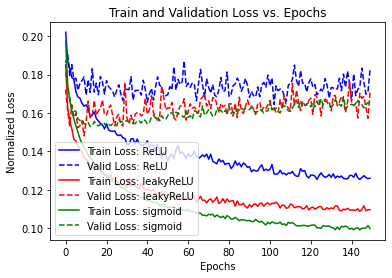

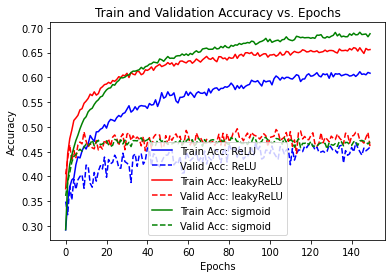

In [21]:
## Plot train and valid loss on one graph
print(all_test_acc_record)
# Line type
train_loss_lt = ['-b', '-r', '-g']
valid_loss_lt = ['--b', '--r', '--g']

for i, activation in enumerate(activations):
    plt.plot(np.arange(epoch_record[i]+1), all_train_loss_record[i], train_loss_lt[i], label=f"Train Loss: {activation}")
    plt.plot(np.arange(epoch_record[i]+1), all_valid_loss_record[i], valid_loss_lt[i], label=f"Valid Loss: {activation}")
plt.xlabel('Epochs')
plt.ylabel('Normalized Loss')
plt.title("Train and Validation Loss vs. Epochs")
plt.legend()
plt.savefig('plots/(e)_act_loss.png')
plt.show()

## Plot Train and valid acc on another

# Line type
train_acc_lt = ['-b', '-r', '-g']
valid_acc_lt = ['--b', '--r', '--g']

for i, activation in enumerate(activations):
    plt.plot(np.arange(epoch_record[i]+1), all_train_acc_record[i], train_acc_lt[i], label=f"Train Acc: {activation}")
    plt.plot(np.arange(epoch_record[i]+1), all_valid_acc_record[i], valid_acc_lt[i], label=f"Valid Acc: {activation}")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Train and Validation Accuracy vs. Epochs")
plt.legend()
plt.savefig('plots/(e)_act_acc.png')
plt.show()


In [16]:
all_test_acc_record

[0.428, 0.4842, 0.4809]